<img src="newlogomioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine learning 2 (Unsupervised learning)</center>

# Challenge S6: Reglas de asociación para análisis de cesta de la compra

In [1]:
nombre = "Juan Pedro"

In [2]:
if nombre == "":
    print("Rellena tu nombre y apellidos!")
else:
    print("Gracias!: ", nombre, ":)")

Gracias!:  Juan Pedro :)


## Objetivos

El objetivo de este challenge es enfrentarse a un problema de generación de reglas de asociación real: a partir de datos de transacciones de compra de un supermercado, realizar un estudio de la cesta de la compra (*market basket analysis*) mediante la generación de reglas de asociación.

In [3]:
# # Descomentar esto para instalar paquete mlxtend
# import sys
# !{sys.executable} -m pip install mlxtend
#!pip install openpyxl

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams.update({'font.size': 14})

import pandas as pd
import openpyxl

## Carga de datos

Para comenzar, cargamos el fichero de tickets de venta:

In [4]:
df = pd.read_excel('data/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Y lo convertimos al formato esperado por la librería de reglas de asociación

In [5]:
# Preprocesamiento y filtrado de columnas no útiles
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df = df[~df['InvoiceNo'].str.contains('C')]

# Filtramos por país, agrupamos por ticket y transponemos
basket = (df[df['Country'] =="Germany"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))

In [6]:
basket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# Convertimos los binarios a enteros
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

In [8]:
basket_sets = basket.applymap(encode_units)
basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [9]:
basket_sets.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536527,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536983,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* ¿Cuál es el tamaño de nuestro conjunto de items $I$ ?

In [10]:
basket_sets.shape[1]

1694

* ¿ Cuál es el tamaño de nuestro conjunto de transacciones $D$ ?

In [11]:
basket_sets.shape[0]

457

## Reglas de asociación con mlxtend

Ahora vamos a utilizar la librería [`mlxtend`](http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/) para generar las reglas de asociación más interesantes en nuestro conjunto de datos. 

* Comenzamos calculando el soporte de los itemsets frecuentes de nuestro conjunto, aplicando un umbral mínimo de 0.07:

In [12]:
frequent_itemsets_07 = apriori(basket_sets, min_support=0.07, use_colnames=True)
frequent_itemsets_07

,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.070022,(ALARM CLOCK BAKELIKE PINK)
2,0.072210,(GUMBALL COAT RACK)
3,0.091904,(JAM MAKING SET PRINTED)
4,0.078775,(JUMBO BAG RED RETROSPOT)
5,0.100656,(JUMBO BAG WOODLAND ANIMALS)
6,0.078775,(LUNCH BAG WOODLAND)
7,0.085339,(PACK OF 72 RETROSPOT CAKE CASES)
8,0.115974,(PLASTERS IN TIN CIRCUS PARADE)
9,0.107221,(PLASTERS IN TIN SPACEBOY)


* Prueba a ejecutar el mismo algoritmo apriori con umbral mínimo de soporte de 0.05 y 0.09. ¿Qué observas? ¿A qué crees que se debe?

In [13]:
frequent_itemsets_05 = apriori(basket_sets, min_support=0.05, use_colnames=True)
frequent_itemsets_05

,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.070022,(ALARM CLOCK BAKELIKE PINK)
2,0.065646,(CHARLOTTE BAG APPLES DESIGN)
3,0.050328,(CHILDRENS CUTLERY DOLLY GIRL)
4,0.061269,(COFFEE MUG APPLES DESIGN)
5,0.063457,(FAWN BLUE HOT WATER BOTTLE)
6,0.072210,(GUMBALL COAT RACK)
7,0.056893,(IVORY KITCHEN SCALES)
8,0.063457,(JAM JAR WITH PINK LID)
9,0.091904,(JAM MAKING SET PRINTED)


In [14]:
frequent_itemsets_09 = apriori(basket_sets, min_support=0.09, use_colnames=True)
frequent_itemsets_09

,support,itemsets
0,0.102845,(6 RIBBONS RUSTIC CHARM)
1,0.091904,(JAM MAKING SET PRINTED)
2,0.100656,(JUMBO BAG WOODLAND ANIMALS)
3,0.115974,(PLASTERS IN TIN CIRCUS PARADE)
4,0.107221,(PLASTERS IN TIN SPACEBOY)
5,0.137856,(PLASTERS IN TIN WOODLAND ANIMALS)
6,0.096280,(RED TOADSTOOL LED NIGHT LIGHT)
7,0.137856,(REGENCY CAKESTAND 3 TIER)
8,0.157549,(ROUND SNACK BOXES SET OF 4 FRUITS)
9,0.245077,(ROUND SNACK BOXES SET OF4 WOODLAND)


De ahora en adelante utilizaremos el primer soporte calculado con un umbral de valor 0.07. 

* ¿Cuál es el item con mayor valor de soporte?

In [15]:
frequent_itemsets_07.iloc[frequent_itemsets_07['support'].idxmax(),:]

support                                 0.245077
itemsets    (ROUND SNACK BOXES SET OF4 WOODLAND)
Name: 17, dtype: object

* Ahora vamos a calcular las reglas de asociación utilizando el soporte calculado previamente. Prueba utilizando la métrica confidence con un umbral mínimo de 1.

In [16]:
as_conf = association_rules(frequent_itemsets_07, metric="confidence", min_threshold=1)
as_conf

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


* Ahora prueba utilizando la métrica lift con un umbral mínimo de 1.

In [17]:
as_lift = association_rules(frequent_itemsets_07, metric="lift", min_threshold=1)
as_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.245077,0.137856,0.074398,0.303571,2.202098,0.040613,1.237951
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509
4,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.102845,0.245077,0.070022,0.680851,2.778116,0.044817,2.365427
5,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.245077,0.102845,0.070022,0.285714,2.778116,0.044817,1.256018


* Sobre estas últimas reglas calculadas, filtra aquellas que tengan un lift mayor que 1.5 y un confidence mayor que 0.7

In [18]:
as_lift[ (as_lift['confidence'] > 0.7) & (as_lift['lift'] > 1.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.52954


* ¿Cómo intepretarías el significado en concreto de estas reglas de asociación generadas?

Que las dos cajas de frutas y comidas se suelen comprar juntas un 80% de las veces. Al tener un valor de lift alto también explica la dependencia entre ambos productos.

## Reglas de asociación a mano

Tomemos como ejemplo la regla de asociación generada en el paso previo. Vamos a realizar los cálculos previamente obtenidos por `mlxtend`, ahora nosotros a mano. 

* Comenzamos por el soporte. Calcula el soporte del antecedente, del consecuente y de ambos, de la última regla de asociación (sin utilizar mlxtend).

In [19]:
soporte_antecedente=basket_sets[basket_sets['ROUND SNACK BOXES SET OF 4 FRUITS']==1].loc[:,'ROUND SNACK BOXES SET OF 4 FRUITS'].count()/basket_sets['ROUND SNACK BOXES SET OF 4 FRUITS'].count()
soporte_antecedente


0.1575492341356674

In [20]:
soporte_precdente=basket_sets[basket_sets['ROUND SNACK BOXES SET OF4 WOODLAND']==1].loc[:,'ROUND SNACK BOXES SET OF4 WOODLAND'].count()/basket_sets['ROUND SNACK BOXES SET OF4 WOODLAND'].count()
soporte_precdente

0.24507658643326038

In [21]:
soporte_conjunto=basket_sets[(basket_sets['ROUND SNACK BOXES SET OF4 WOODLAND']==1)&(basket_sets['ROUND SNACK BOXES SET OF 4 FRUITS']==1)].loc[:,'ROUND SNACK BOXES SET OF4 WOODLAND'].count()/basket_sets['ROUND SNACK BOXES SET OF4 WOODLAND'].count()
soporte_conjunto

0.13129102844638948

* Una vez calculado los soportes, calcula la confianza (confidence) de la regla.

In [22]:
confidence=soporte_conjunto/soporte_antecedente
confidence

0.8333333333333333

* Ahora calcula el lift.

In [23]:
lift=soporte_conjunto/(soporte_antecedente*soporte_precdente)
lift

3.4002976190476186

Comprueba que obtienes los mismos resultados que con `mlxtend`.

## Representación gráfica y análisis país adicional

* Utilizando los datos calculados por `mlxtend`, realizar un scatter plot que represente el `confidence` frente al `lift` de las reglas de asociación obtenidas.


In [24]:
def plot_x_y(x,y,label1,label2):
    
    fig, ax = plt.subplots(figsize=(8, 8))

    for i, label1,label2 in zip(range(0,len(label1)),label1,label2):
        ax.scatter(x=x[i],y=y[i], marker='o',s=150, alpha=0.9,label=' '+str(label1)+'->\n'+str(label2)+'\n')
        ##ax.annotate(label, (x[i], y[i]),fontdict=dict(fontsize=11))
#         ax.text(x=x[i],y=y[i], s=(label) , ha='center', va='bottom' ,fontdict=dict(fontsize=11))

    # Eliminamos el marco.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # ax.set_xlim([0, 20])
    # ax.set_ylim([0, 20])

    ax.set_ylabel("Confidence")
    ax.set_xlabel("Lift")

    ## Mostramos la cuadricula.
    ax.grid(True)
    
    ax.legend(loc="center right",title="", bbox_to_anchor=(2.2, 0.5),frameon=True,fontsize=10)

    ## Ocultamos el marco.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Titulamos la figura.
    fig.suptitle('Relación entre Lift y Confidence');
    
    return fig, ax

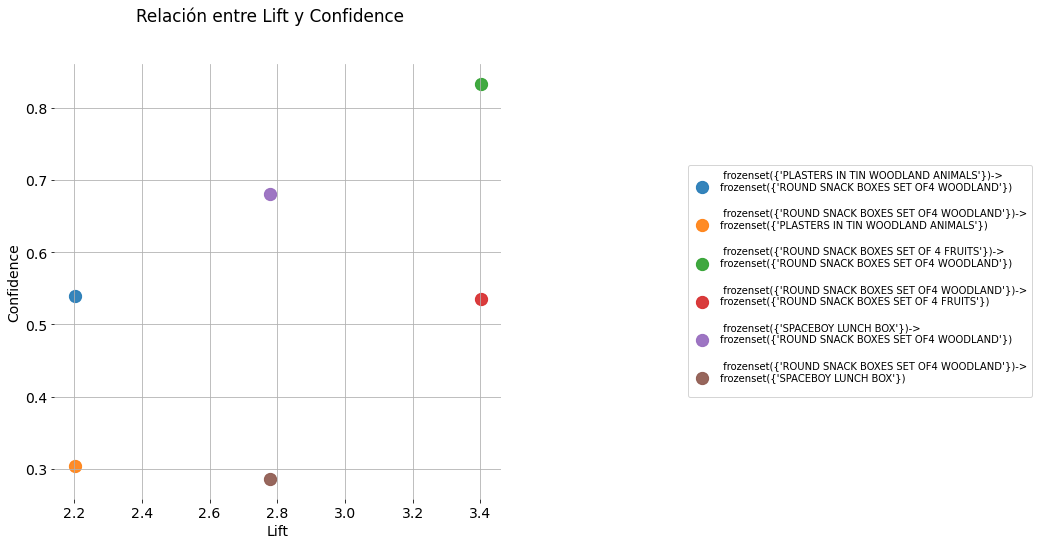

In [25]:
plot_x_y(as_lift['lift'],as_lift['confidence'],as_lift['antecedents'],as_lift['consequents']);

* En el análisis realizado previamente, se filtraron las ventas únicamente de Alemania. Calcular las reglas de asociación para otro país y comparar los resultados obtenidos con los de antes.

* Elegimos Francia

In [26]:
# Elegimos como país France


# Filtramos por país, agrupamos por ticket y transponemos
basket_F = (df[df['Country'] =="France"]
          .groupby(['InvoiceNo', 'Description'])['Quantity']
          .sum().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))
basket_F

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537065,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
basket_sets_F = basket_F.applymap(encode_units)
basket_sets_F.drop('POSTAGE', inplace=True, axis=1)

In [28]:
basket_sets_F.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 EGG HOUSE PAINTED WOOD,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE WOODLAND,...,WRAP VINTAGE PETALS DESIGN,YELLOW COAT RACK PARIS FASHION,YELLOW GIANT GARDEN THERMOMETER,YELLOW SHARK HELICOPTER,ZINC STAR T-LIGHT HOLDER,ZINC FOLKART SLEIGH BELLS,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536974,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537065,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Calculamos los Items ***I***

In [29]:
# Para France tenemos los siguientes I (items)
basket_sets_F.shape[1]

1562

* Calculamos las Transacciones o ***D***

In [30]:
# Para France tenemos las siguientes D (transactions)
basket_sets_F.shape[0]

392

* Al igual que para Germany vamos a sacar los soportes de productos de la cesta de la compra con umbral mínimo del 0,07

In [31]:
frequent_itemsets_F_07 = apriori(basket_sets_F, min_support=0.07, use_colnames=True)
frequent_itemsets_F_07

,support,itemsets
0,0.071429,(4 TRADITIONAL SPINNING TOPS)
1,0.096939,(ALARM CLOCK BAKELIKE GREEN)
2,0.102041,(ALARM CLOCK BAKELIKE PINK)
3,0.094388,(ALARM CLOCK BAKELIKE RED)
4,0.081633,(BAKING SET 9 PIECE RETROSPOT)
5,0.071429,(CHILDRENS CUTLERY DOLLY GIRL)
6,0.099490,(DOLLY GIRL LUNCH BOX)
7,0.096939,(JUMBO BAG RED RETROSPOT)
8,0.076531,(JUMBO BAG WOODLAND ANIMALS)
9,0.125000,(LUNCH BAG APPLE DESIGN)


* Calculamos el item con mayor valor de soporte

In [32]:
# frequent_itemsets_F_07.sort_values('support',ascending=False)
frequent_itemsets_F_07.iloc[frequent_itemsets_F_07['support'].idxmax(),:]

support                 0.188776
itemsets    (RABBIT NIGHT LIGHT)
Name: 22, dtype: object

* Calculamos reglas de confianza para la metrica confidence con umbral mínimo de 1

In [33]:
as_conf_F = association_rules(frequent_itemsets_F_07, metric="confidence", min_threshold=1)
as_conf_F

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction


* Calculamos reglas con un lift con un umbral mínimo de 1

In [34]:
as_lift_F = association_rules(frequent_itemsets_F_07, metric="lift", min_threshold=1)
as_lift_F

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE PINK),0.096939,0.102041,0.073980,0.763158,7.478947,0.064088,3.791383
1,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE GREEN),0.102041,0.096939,0.073980,0.725000,7.478947,0.064088,3.283859
2,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
4,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135
5,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061
6,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX),0.099490,0.125000,0.071429,0.717949,5.743590,0.058992,3.102273
7,(SPACEBOY LUNCH BOX),(DOLLY GIRL LUNCH BOX),0.125000,0.099490,0.071429,0.571429,5.743590,0.058992,2.101190
8,(PLASTERS IN TIN SPACEBOY),(PLASTERS IN TIN CIRCUS PARADE),0.137755,0.168367,0.089286,0.648148,3.849607,0.066092,2.363588
9,(PLASTERS IN TIN CIRCUS PARADE),(PLASTERS IN TIN SPACEBOY),0.168367,0.137755,0.089286,0.530303,3.849607,0.066092,1.835747


In [35]:
# Como nos salen muchas reglas con indices muy altos, vamos a centrarnos en un top 6 como salieron para Germany, y así hacemos una
# comparativa final.
as_lift_F_altos=as_lift_F[ (as_lift_F['confidence'] > 0.7) & (as_lift_F['lift'] > 7.5) ]
as_lift_F_altos.reset_index(drop=True,inplace=True)
as_lift_F_altos

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.096939,0.094388,0.079082,0.815789,8.642959,0.069932,4.916181
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.094388,0.096939,0.079082,0.837838,8.642959,0.069932,5.568878
2,(ALARM CLOCK BAKELIKE PINK),(ALARM CLOCK BAKELIKE RED),0.102041,0.094388,0.073980,0.725000,7.681081,0.064348,3.293135
3,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE PINK),0.094388,0.102041,0.073980,0.783784,7.681081,0.064348,4.153061
4,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.102041,0.127551,0.099490,0.975000,7.644000,0.086474,34.897959
5,(SET/6 RED SPOTTY PAPER PLATES),"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",0.127551,0.102041,0.099490,0.780000,7.644000,0.086474,4.081633


* Los resultados de estas reglas para France, vemos:
    - Los valores de **lift** son extremandente altos, comparados con los Germany, por lo que hay una relación directa muy fuerte en la compra por ejemplo de los relojes con alarma de distintos colores. Es decir se están comprando a la vez, en un alto porcentaje, varios relojes de distitnos colores. También se ve una relación muy fuerte en la compra de servilletas y los platos. 
    - Unos indices de **confidence**, las veces que se compran juntos, muy altos, en más del 70%, llegando incluso a niveles de más del 95% las servilletas y platos de papel.

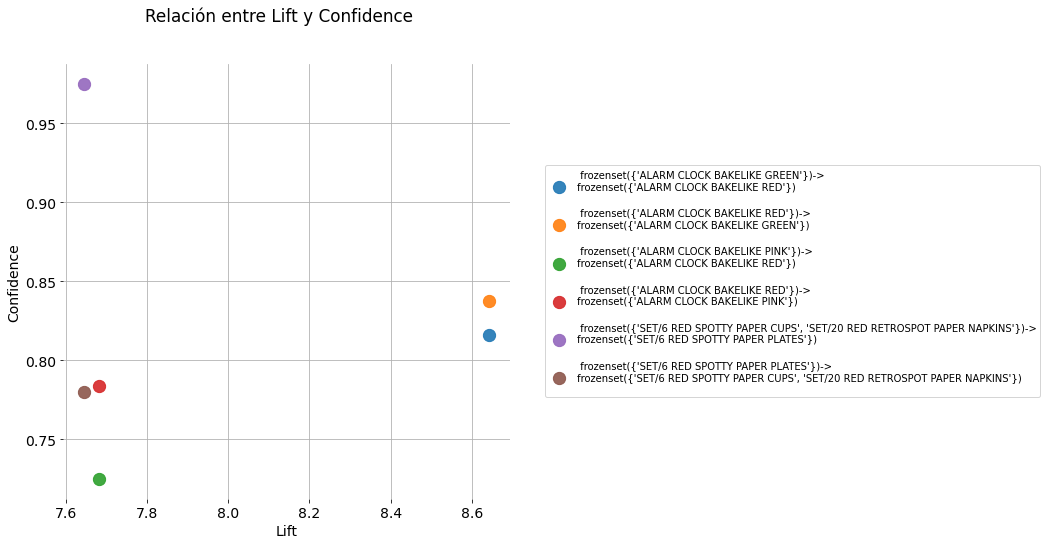

In [36]:
plot_x_y(as_lift_F_altos['lift'],
         as_lift_F_altos['confidence'],
         as_lift_F_altos['antecedents'],
         as_lift_F_altos['consequents']);

* Hacemos una comparativa entre las 6 reglas de compra con lift y confidencie más altos que hemos obtenido para Francia y Alemania

In [37]:
#Función que genera un scatter plot comparativ entre dos paises.
def plot_x_y_comparative(x1,y1,x2,y2,label1,label2):
    
    fig, ax = plt.subplots(figsize=(8, 8))

    ax.scatter(x=x1,y=y1, marker='o',s=150, alpha=0.9,label=label1)
    ax.scatter(x=x2,y=y2, marker='o',s=150, alpha=0.9,label=label2)
        ##ax.annotate(label, (x[i], y[i]),fontdict=dict(fontsize=11))
#         ax.text(x=x[i],y=y[i], s=(label) , ha='center', va='bottom' ,fontdict=dict(fontsize=11))

    # Eliminamos el marco.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # ax.set_xlim([0, 20])
    # ax.set_ylim([0, 20])

    ax.set_ylabel("Confidence")
    ax.set_xlabel("Lift")

    ## Mostramos la cuadricula.
    ax.grid(True)
    
    ax.legend(loc="center right",title="", bbox_to_anchor=(1.4, 0.5),frameon=True,fontsize=14)

    ## Ocultamos el marco.
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Titulamos la figura.
    fig.suptitle('Relación entre Lift y Confidence');
    
    return fig, ax

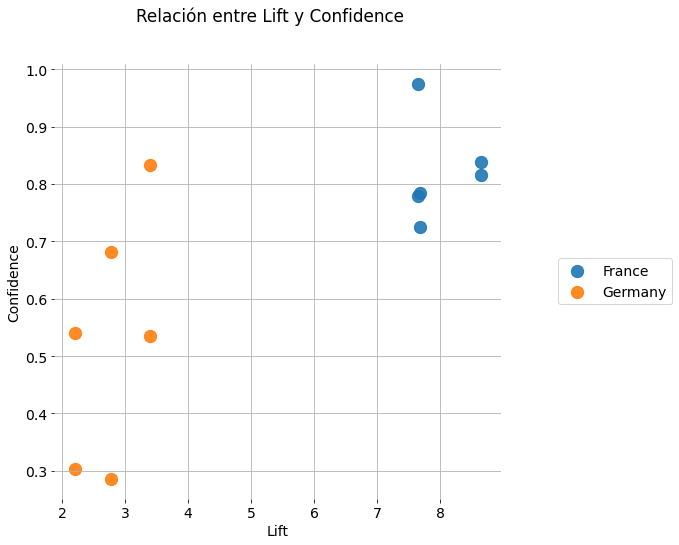

In [38]:
#Ploteamos de forma comparativa dodne se situan las reglas de productos Germany y France
plot_x_y_comparative(as_lift_F_altos['lift'],
         as_lift_F_altos['confidence'],
         as_lift['lift'],
         as_lift['confidence'],
         'France',
         'Germany');